Random Forest Classifier Metrics:
Accuracy: 0.9854, Precision: 1.0000, Recall: 0.9709, F1-score: 0.9852

Logistic Regression Classifier Metrics:
Accuracy: 0.7951, Precision: 0.7563, Recall: 0.8738, F1-score: 0.8108

Support Vector Classifier Metrics:
Accuracy: 0.8878, Precision: 0.8509, Recall: 0.9417, F1-score: 0.8940


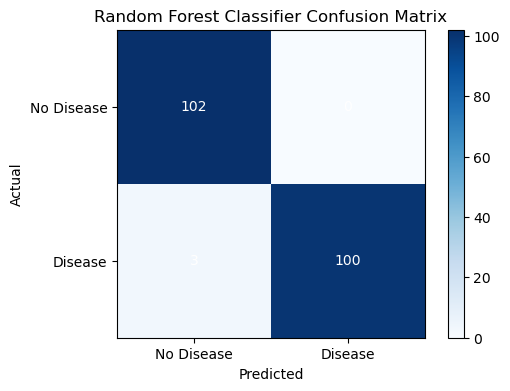

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       102
         1.0       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle

# Load the dataset (assuming it's in a CSV file named 'heart.csv')
data = pd.read_csv('heart.csv')

# Handling missing values (if any)
imputer = SimpleImputer(strategy='mean')
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Splitting features and target variable
X = data_filled.drop('target', axis=1)
y = data_filled['target']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

X_train, X_test = scaler_standard(X_train, X_test)

# Initializing machine learning algorithms
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression(random_state=42)
svc_classifier = SVC(random_state=42)

# Training the model on the training data
rf_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
svc_classifier.fit(X_train, y_train)

# Evaluating the models using different algorithms on the testing data
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)
svc_predictions = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(y_test, rf_predictions)
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, lr_predictions)
svc_accuracy, svc_precision, svc_recall, svc_f1 = evaluate_model(y_test, svc_predictions)

# Print evaluation metrics
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-score: {rf_f1:.4f}")

print("\nLogistic Regression Classifier Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-score: {lr_f1:.4f}")

print("\nSupport Vector Classifier Metrics:")
print(f"Accuracy: {svc_accuracy:.4f}, Precision: {svc_precision:.4f}, Recall: {svc_recall:.4f}, F1-score: {svc_f1:.4f}")


# Plot the confusion matrix for Random Forest Classifier
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.imshow(rf_conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.yticks([0, 1], ['No Disease', 'Disease'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, rf_conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

# Generate classification report for Random Forest Classifier
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))


In [2]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
883,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
302,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
102,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
266,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
237,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
588,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
82,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
651,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


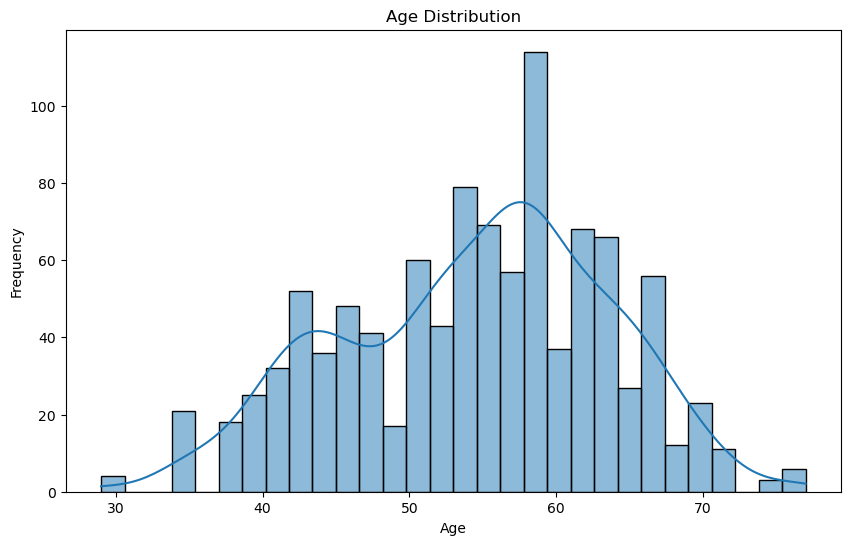

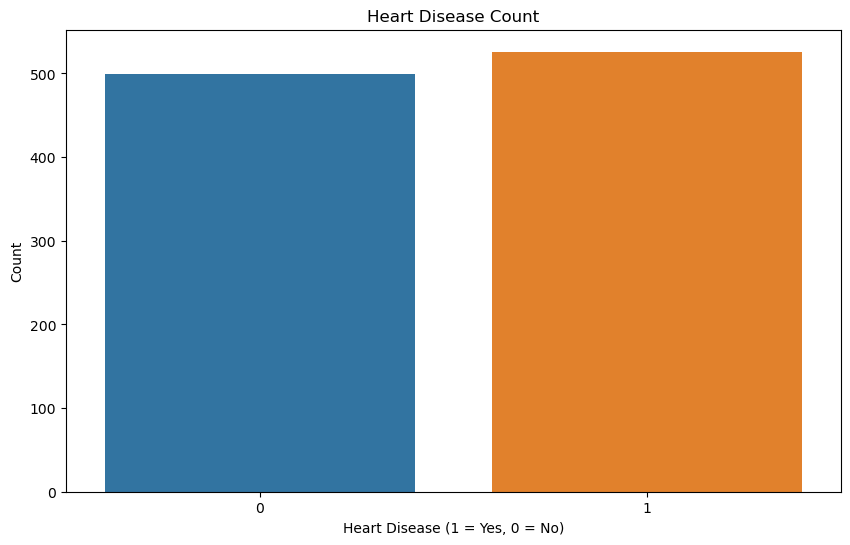

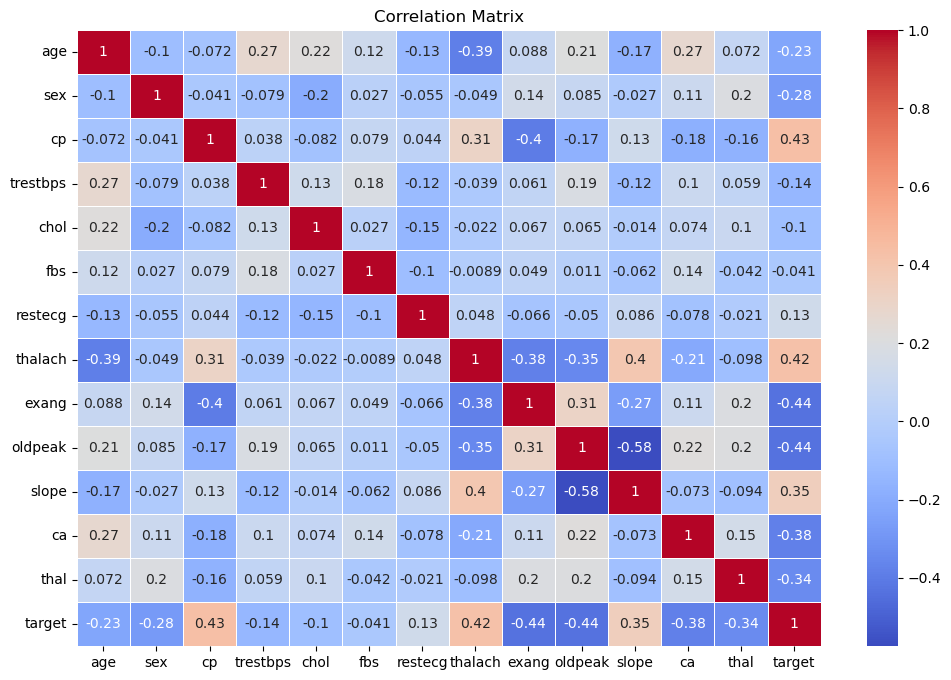

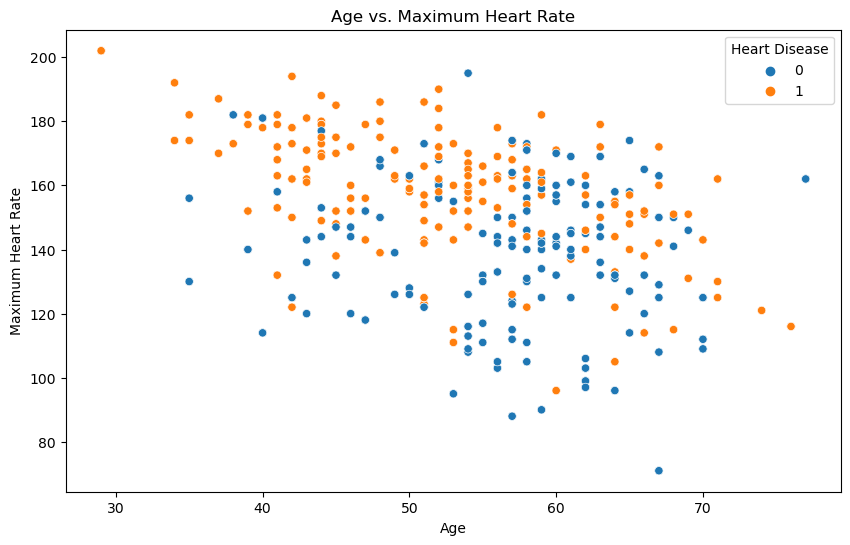

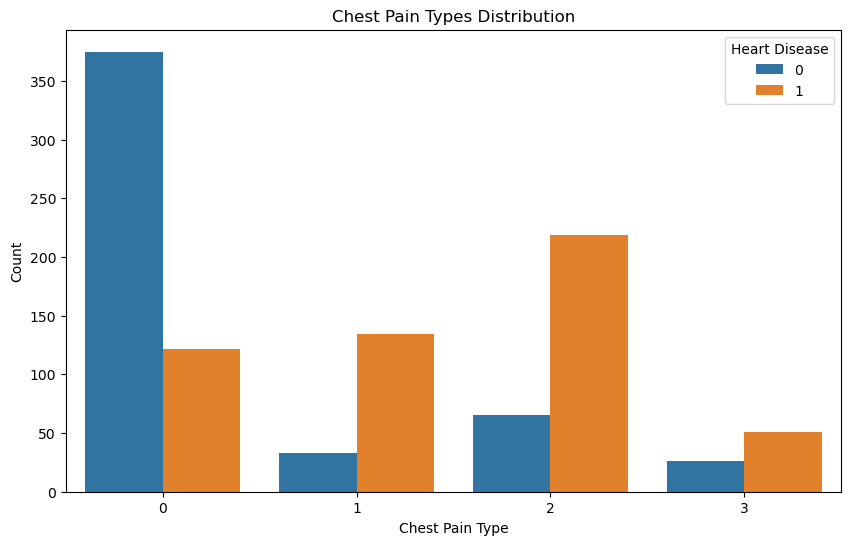

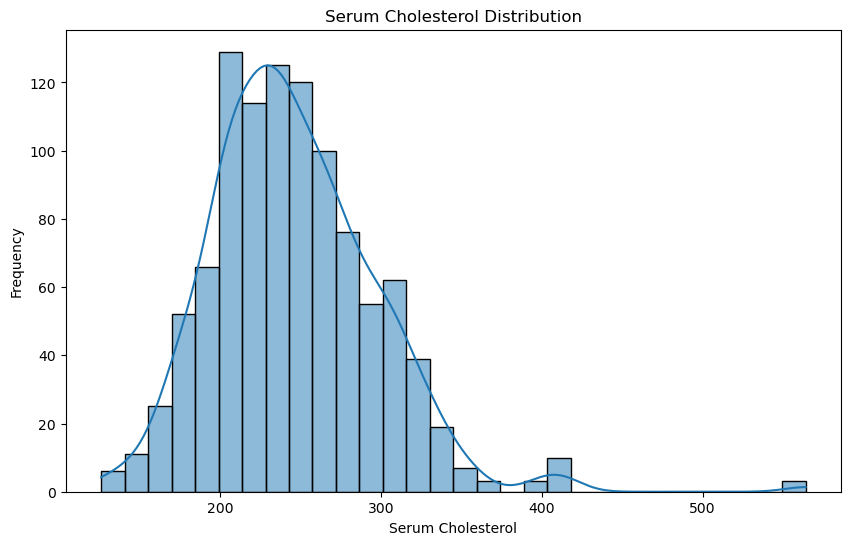

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(df.head())

# Visualizing the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the count of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Count')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualizing the relationship between age and max heart rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Heart Disease')
plt.show()

# Visualizing the distribution of chest pain types
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=df, hue='target')
plt.title('Chest Pain Types Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

# Visualizing the distribution of serum cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, bins=30)
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships between different features
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()


In [3]:
data.shape

(1025, 14)

In [4]:
params={'max_depth':[3,5,10,None],
        'n_estimators':[100,200,300],
        'criterion':['gini','entropy']
}
classifier = RandomForestClassifier()

In [5]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.957 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=1.000 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.988 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.963 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.957 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.927 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.939 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.939 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.896 total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [6]:
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_test_accuracy = accuracy_score(y_test, y_test_pred)

In [7]:
print("-- Accuracy for Training Data: {:.2f}".format(model_train_accuracy*100))
print("-- Accuracy for test data: {:.2f}".format(model_test_accuracy*100))

-- Accuracy for Training Data: 100.00
-- Accuracy for test data: 98.54


In [8]:
file = open('ModelForTesting.pkl','wb')
pickle.dump(cv,file)
file.close()